# Importing libraries

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# Transforming data to tensor

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Loading MNIST dataset

In [ ]:
# Load training data
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Pytorch Dataloader

In [ ]:
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Encoder class

In [ ]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        return x

# Decoder class

In [ ]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()

        self.conv_transpose1 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=1, padding=0)
        # Upsample to 7x7
        self.conv_transpose2 = nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=0)
        # Upsample to 14x14
        self.conv_transpose3 = nn.ConvTranspose2d(16, 8, kernel_size=4, stride=2, padding=1, output_padding=0)
        # Upsample to 28x28 (final size)
        self.conv_transpose4 = nn.ConvTranspose2d(8, 1, kernel_size=4, stride=2, padding=1, output_padding=0)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv_transpose1(x))
        x = self.relu(self.conv_transpose2(x))
        x = self.relu(self.conv_transpose3(x))
        x = self.conv_transpose4(x)
        return x

# Encoder Decoder

In [ ]:
class EnocderDecoder(nn.Module):
  def __init__(self):

    super(EnocderDecoder,self).__init__()

    self.encoder = Encoder()
    self.decoder = Decoder()

  def forward(self,x):
    x = self.encoder(x)
    x = self.decoder(x)

    return x

# Training the model

In [ ]:
encoder_decoder = EnocderDecoder()

criterion = nn.MSELoss()

optimizer = optim.Adam(encoder_decoder.parameters(), lr=0.001)

for epoch in range(10):
    for inputs, _ in train_loader:

        optimizer.zero_grad()

        outputs = encoder_decoder(inputs)

        loss = criterion(outputs, inputs)

        loss.backward()

        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 0.02409454807639122
Epoch 2, Loss: 0.014343018643558025
Epoch 3, Loss: 0.012206248007714748
Epoch 4, Loss: 0.011131241917610168
Epoch 5, Loss: 0.009715535677969456
Epoch 6, Loss: 0.00904675293713808
Epoch 7, Loss: 0.008271271362900734
Epoch 8, Loss: 0.009369025006890297
Epoch 9, Loss: 0.0072496188804507256
Epoch 10, Loss: 0.007882251404225826


# Before training results

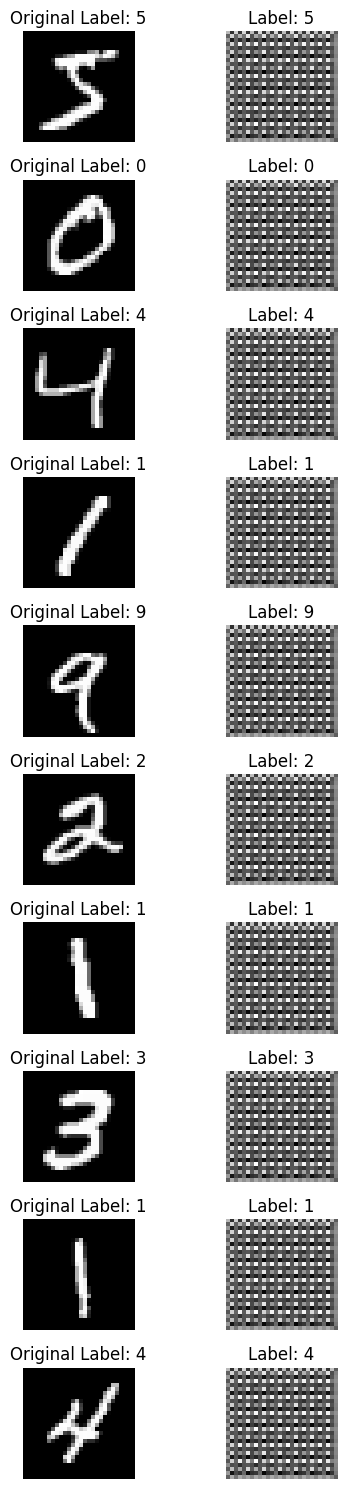

In [ ]:
fig, axes = plt.subplots(10, 2, figsize=(5, 15))

for i in range(10):

  image, label = train_loader.dataset[i]

  axes[i,0].imshow(image.squeeze(),cmap='gray')
  axes[i,0].set_title(f'Original Label: {label}')
  axes[i,0].axis('off')

  image = encoder_decoder(image.unsqueeze(0))
  axes[i,1].imshow(image.squeeze().detach().numpy(),cmap='gray')
  axes[i,1].set_title(f'Label: {label}')
  axes[i,1].axis('off')

plt.tight_layout()
plt.show()

# After training results

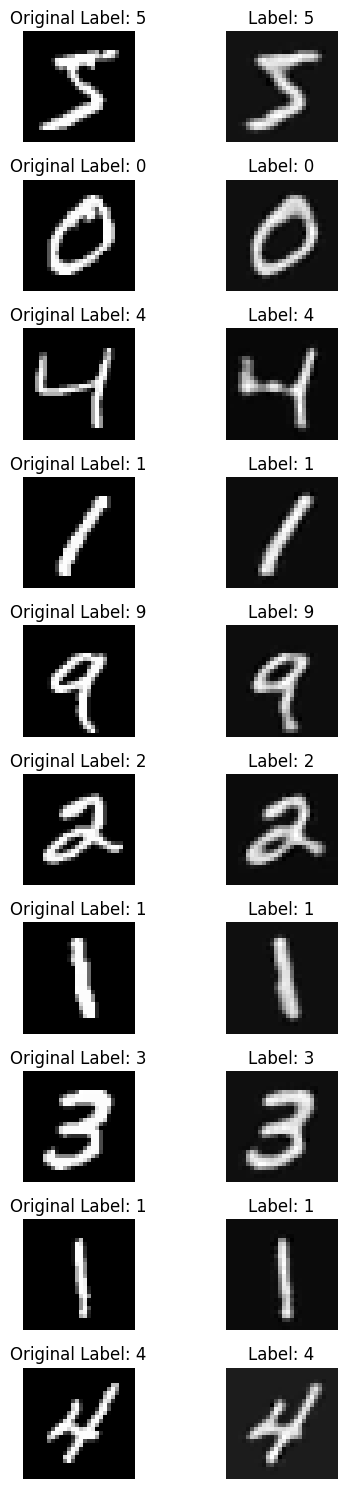

In [ ]:
fig, axes = plt.subplots(10, 2, figsize=(5, 15))

for i in range(10):

  image, label = train_loader.dataset[i]

  axes[i,0].imshow(image.squeeze(),cmap='gray')
  axes[i,0].set_title(f'Original Label: {label}')
  axes[i,0].axis('off')

  image = encoder_decoder(image.unsqueeze(0))
  axes[i,1].imshow(image.squeeze().detach().numpy(),cmap='gray')
  axes[i,1].set_title(f'Label: {label}')
  axes[i,1].axis('off')

plt.tight_layout()
plt.show()